Computational geometry is the study of algorithms which relate to geometry and often serves as the bedrock for many GIS functionalities. On the surface a problem in CG can look quite simple, yet when trying to write code for it can quickly a daunting yet fun challenge. Thankfully many problems in GC have been solved and there are mature libraries full of solutions, [CGAL](https://www.cgal.org/) is probably the most promonent. There are Python bindings to it and is used in applications like QGIS. That being said, being able to solve problems in CG isn't needed to be able to understand and use the existing concepts and solutions.

Common problems in CG can appear as such: Which points are in which polygons? To the human eye such a quesition would seem trivial, yet coding it may not come as intutively. For this intro I'm going to focus on one of the most fundamental concepts in CG- the [convex hull](https://en.wikipedia.org/wiki/Convex_hull). Imagine you had some on a board and tied a rubber band around them, that would produce the shape of a convex hull. It is the minimum bounding area for a spatial features (points, polygon or line)  and it must be convex. 

In [1]:
from shapely.geometry import MultiPoint

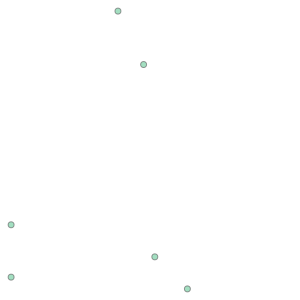

In [2]:
mp=MultiPoint([(-300, 100), (30, -20), (-300, 2),(-52, 400),  (-100, 500) ,(-31, 40)])
mp

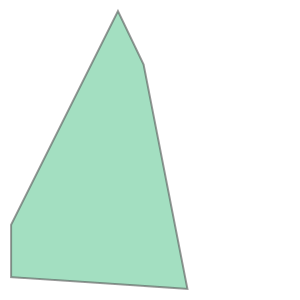

In [3]:
mp.convex_hull


Now we are going to go over A.M. Andrew's Monotone Chain solution which can be solved in *O(nlog-n)* time. This solution and others can be found [here](https://en.wikibooks.org/wiki/Algorithm_Implementation/Geometry/Convex_hull/Monotone_chain)

In [4]:
def convex_hull_monotone(points):
    """Computes the convex hull of a set of 2D points.

    Input: an iterable sequence of (x, y) pairs representing the points.
    Output: a list of vertices of the convex hull in counter-clockwise order,
      starting from the vertex with the lexicographically smallest coordinates.
    Implements Andrew's monotone chain algorithm. O(n log n) complexity.
    """

    # Sort the points lexicographically (tuples are compared lexicographically).
    # Remove duplicates to detect the case we have just one unique point.
    points = sorted(set(points))

    # Boring case: no points or a single point, possibly repeated multiple times.
    if len(points) <= 1:
        return points

    # 2D cross product of OA and OB vectors, i.e. z-component of their 3D cross product.
    # Returns a positive value, if OAB makes a counter-clockwise turn,
    # negative for clockwise turn, and zero if the points are collinear.
    def cross(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    # Build lower hull 
    lower = []
    for p in points:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)

    # Build upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    # Concatenation of the lower and upper hulls gives the convex hull.
    # Last point of each list is omitted because it is repeated at the beginning of the other list. 
    return lower[:-1] + upper[:-1]